In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Loading and analyzing raw data

In [25]:
raw_data=pd.read_csv("resume_data.csv")

print("Basic info of raw data")
print(raw_data.info())

raw_data.head()

Basic info of raw data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              784 non-null    object 
 1   career_objective                     4740 non-null   object 
 2   skills                               9488 non-null   object 
 3   educational_institution_name         9460 non-null   object 
 4   degree_names                         9460 non-null   object 
 5   passing_years                        9460 non-null   object 
 6   educational_results                  9460 non-null   object 
 7   result_types                         9460 non-null   object 
 8   major_field_of_studies               9460 non-null   object 
 9   professional_company_names           9460 non-null   object 
 10  company_urls                         9460 non-null   object 
 11  start_d

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


Exploratory Data Analysis

Missing values in each column: 
address                                8760
career_objective                       4804
skills                                   56
educational_institution_name             84
degree_names                             84
passing_years                            84
educational_results                      84
result_types                             84
major_field_of_studies                   84
professional_company_names               84
company_urls                             84
start_dates                              84
end_dates                                84
related_skils_in_job                     84
positions                                84
locations                                84
extra_curricular_activity_types        6118
extra_curricular_organization_names    6118
extra_curricular_organization_links    6118
role_positions                         6118
languages                              8844
proficiency_levels                     8844


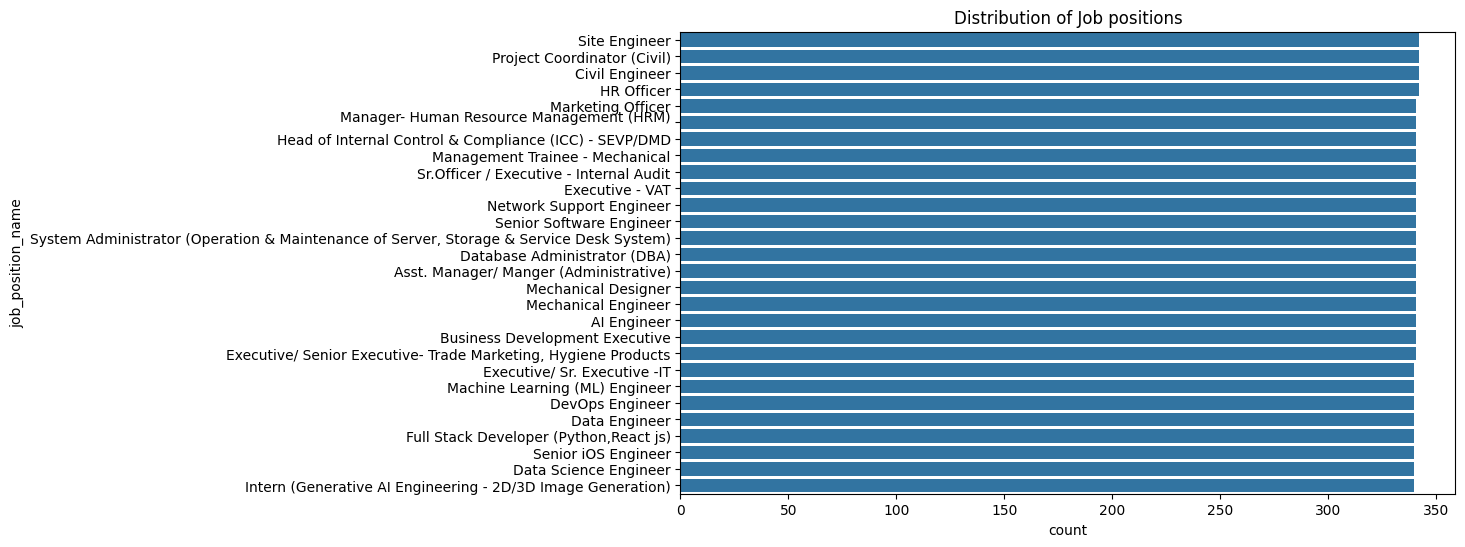

In [26]:
missing_values=raw_data.isnull().sum()
print("Missing values in each column: ")
print(missing_values[missing_values>0])

duplicates=raw_data.duplicated().sum()
print("Number of duplicate rows: ",duplicates)

for col in raw_data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {raw_data[col].nunique()}")


plt.figure(figsize=(10,6))
sns.countplot(y='job_position_name', data=raw_data, order=raw_data['job_position_name'].value_counts().index)
plt.title('Distribution of Job positions')
plt.show()

Extract experience from start and end dates


In [ ]:
def calculate_experience(start_dates, end_dates):
    start_dates = pd.to_datetime(start_dates, errors='coerce')
    end_dates = pd.to_datetime(end_dates, errors='coerce')
    experience=(end_dates-start_dates).dt.days/365
    return experience.fillna(0).astype(int)

if 'start_dates' in raw_data.columns and 'end_dates' in raw_data.columns:
    raw_data['Experience'] = calculate_experience(raw_data['start_dates'], raw_data['end_dates'])
else:
    missing_columns = []
    if 'start_dates' not in raw_data.columns:
        missing_columns.append('start_dates')
    if 'end_dates' not in raw_data.columns:
        missing_columns.append('end_dates')
    print(f"Error: The following columns are missing from the DataFrame: {missing_columns}")
    print("Please ensure your CSV file contains these columns or adjust the code accordingly.")

In [31]:
columns_to_keep=["career_objective","skills","degree_names","major_field_of_studies","start_dates","end_dates","positions","job_position_name","educationaL_requirements","experiencere_requirement","responsibilities","skills_required","matched_score"]
cleaned_data=raw_data[columns_to_keep]
cleaned_data.head()

,career_objective,skills,degree_names,major_field_of_studies,start_dates,end_dates,positions,job_position_name,educationaL_requirements,experiencere_requirement,responsibilities,skills_required,matched_score
0,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['B.Tech'],['Electronics'],['Nov 2019'],['Till Date'],['Big Data Analyst'],Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['Mathematics', 'Statistics']",['Sep 2019'],['Till Date'],['Business Analyst'],Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,"['Software Development', 'Machine Learning', '...",['B.Tech'],['Electronics/Telecommunication'],['June 2018'],['Till Date'],['Software Developer (Machine Learning Enginee...,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...",['Computer Applications Specialist Certificate...,['Computer Applications'],"['January 2011', 'January 2008', 'January 2006...","['November 2015', 'January 2010', 'January 200...","['Accountant', 'Accounts Receivable Clerk', 'M...",Business Development Executive,Bachelor/Honors,1 to 3 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Bachelor of Business Administration'],['Accounting'],"['January 2016', 'January 2016', 'January 2012...","['Current', 'January 2016', 'January 2015', 'J...","['Staff Accountant', 'Senior Accountant', 'Tax...",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


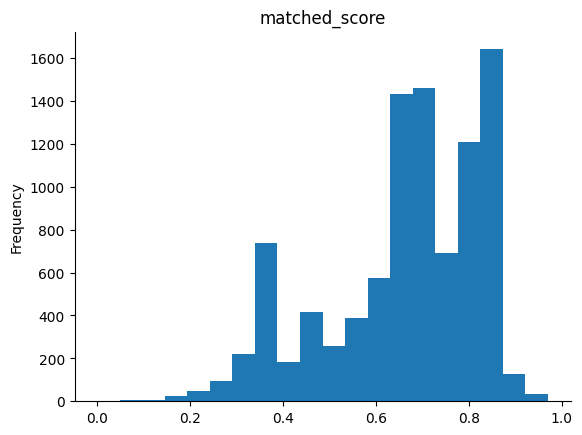

In [29]:
# @title matched_score

from matplotlib import pyplot as plt
cleaned_data['matched_score'].plot(kind='hist', bins=20, title='matched_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

Handle missing values

In [32]:
cleaned_data.fillna("Not Provided", inplace=True)

<ipython-input-32-e5342e3b94d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.fillna("Not Provided", inplace=True)


Format list-like strings

In [36]:
def clean_list_column(column):
    return column.str.replace(r"\[|\]|'", "", regex=True).str.replace(","," , ")

for col in ["skills", "degree_names", "major_field_of_studies", "positions", "responsibilities", "skills_required"]:
    cleaned_data[col] = clean_list_column(cleaned_data[col])

<ipython-input-36-cc04da493a6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = clean_list_column(cleaned_data[col])


Text preprocessing

In [42]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [47]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z0-9 ]", "", text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

cleaned_data["career_objective"] = cleaned_data["career_objective"].astype(str).apply(preprocess_text)


<ipython-input-47-e3633a3ddcac>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["career_objective"] = cleaned_data["career_objective"].astype(str).apply(preprocess_text)


TF-IDF Vectorization for text fields

In [49]:
vectorizer = TfidfVectorizer()
skill_matrix = vectorizer.fit_transform(cleaned_data["skills"].astype(str))
print("TF-IDF matrix shape:", skill_matrix.shape)

TF-IDF matrix shape: (9544, 2473)


In [50]:
cleaned_data.to_csv("Resume-JD.csv", index=False)
print("Data cleaning complete. Cleaned file saved as Resume-JD.csv")

Data cleaning complete. Cleaned file saved as Resume-JD.csv
